# Sales Prediction Using Python 

##### Business Problem:
The business problem is to predict future sales for a product or service-based business based on various factors such as advertising expenditure, target audience segmentation, and advertising platform. Accurate sales prediction is crucial for businesses to optimize their marketing strategies, allocate resources effectively, and make informed decisions to maximize revenue and profitability.

##### Business Insight:
Sales prediction using machine learning enables businesses to forecast future demand for their products or services, identify trends and patterns in consumer behavior, and optimize marketing efforts. By analyzing historical sales data along with relevant predictors such as advertising spend and audience demographics, businesses can gain insights into the factors driving sales and tailor their marketing strategies accordingly. This helps in maximizing return on investment (ROI) for marketing campaigns and improving overall business performance.

##### Business Objective:
The primary business objective is to develop an accurate sales prediction model that can forecast future sales based on key predictors such as advertising expenditure, audience segmentation, and advertising platform. The model should provide actionable insights to guide marketing decision-making, optimize advertising budgets, and enhance sales performance. Additionally, the objective may include evaluating the effectiveness of different marketing strategies and identifying opportunities for improvement.

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

In [2]:
# Load dataset

sales = pd.read_csv(r"C:\Users\kashinath konade\Downloads\Sales Prediction using python\Advertising.csv")
print(sales)

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


##### Exploratory Data Analysis

In [3]:
# View the first few rows of the dataset

sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Get the column names of the dataset

sales.columns


Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
# To rename the column 'Unnamed: 0' to 'Index'
sales.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [6]:
# Get the shape of the dataset (rows, columns)

sales.shape

(200, 5)

In [7]:
# Check information about the dataset, data types, and missing values

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
sales.isnull().values.any()
sales.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#### Data Visualization

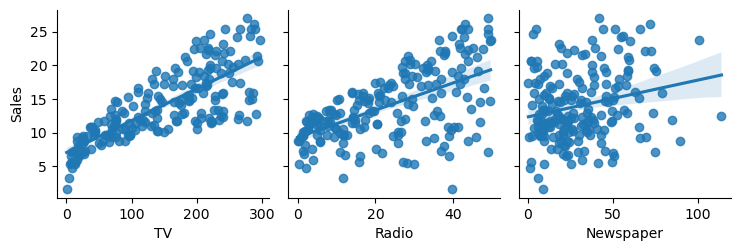

In [9]:
# Scatter plots to check the linearity assumption between each independent variable (TV, Radio, Newspaper) and the dependent variable (Sales)

sns.pairplot(sales, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

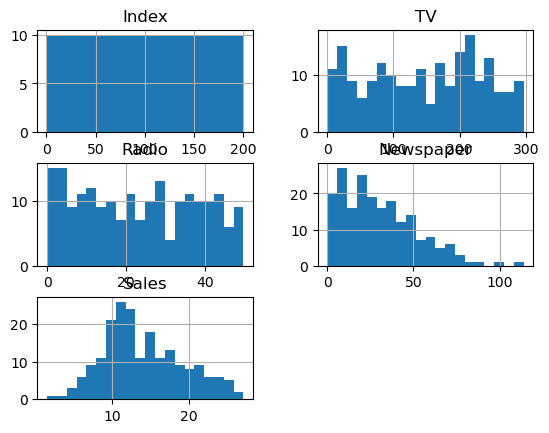

In [10]:
# Histograms to check the normality assumption of the dependent variable (Sales)

sales.hist(bins=20)


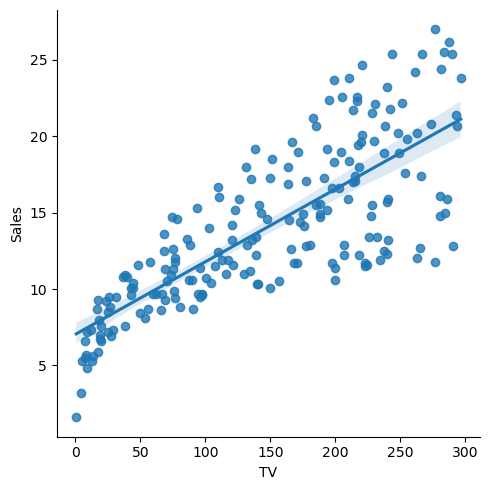

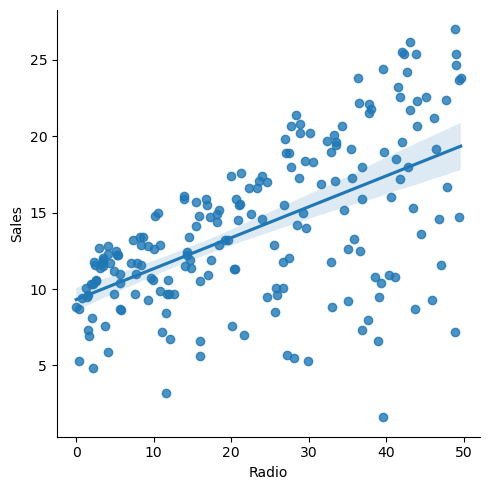

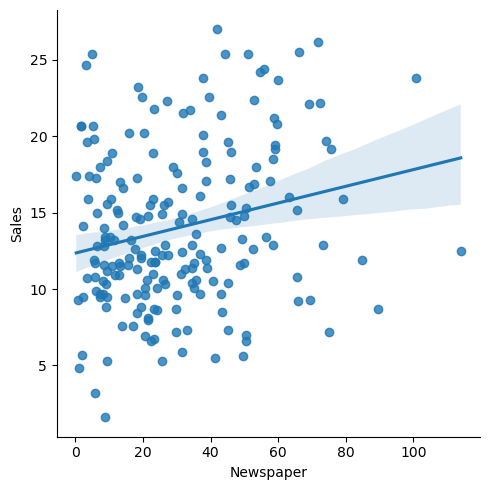

In [11]:
# Linear regression plots to visualize the relationship between each independent variable and the dependent variable

sns.lmplot(x='TV', y='Sales', data=sales)
sns.lmplot(x='Radio', y='Sales', data=sales)
sns.lmplot(x='Newspaper',y= 'Sales', data=sales)


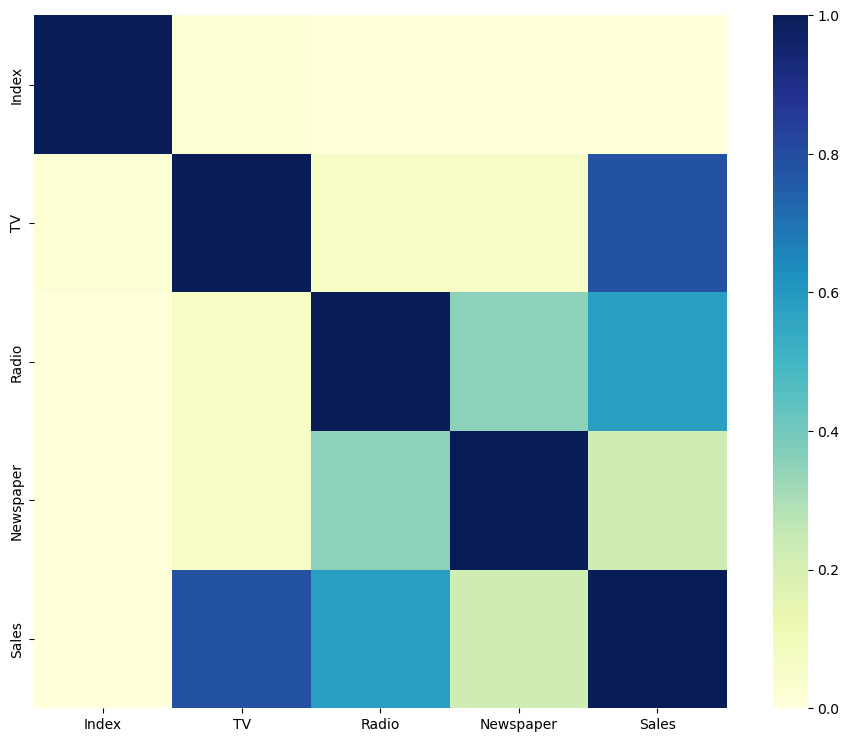

In [12]:
# Correlation Heatmap to check for multicollinearity among independent/dependent variables

corrmat = sales.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=0, vmax=1, square=True, cmap="YlGnBu", ax=ax)
plt.show()

In [13]:
# Model Preparation

X = sales.drop('Sales', axis=1)
y = sales[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


In [14]:
# Linear Regression Model

lin_model = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=sales).fit()

In [15]:
# Print the coefficients of the linear model

print(lin_model.params, "\n")


Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64 



In [16]:
# Evaluate the model

results = []
names = []

In [17]:
# Define a list of models to evaluate

models = [('LinearRegression', LinearRegression())]

In [18]:
# Loop through each model, fit it to the data, and calculate the RMSE

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

LinearRegression: 1.703648


In [19]:
# Make predictions on new data

new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: 0    16.915917
dtype: float64
